In [1]:
import shooting

In [2]:
import shooting.tests

In [3]:
shooting.tests.test_get_energies_sho()

In [4]:
shooting.tests.test_harmonic()

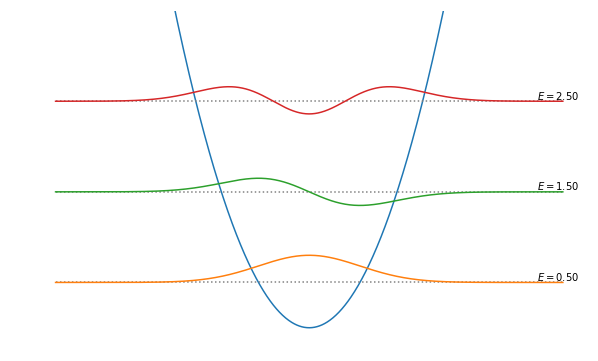

In [5]:
%matplotlib inline
shooting.plot_energy_diagram(shooting.harmonic)

In [6]:
#shooting.tests.test_get_energies_isw()

Automatic pdb calling has been turned ON


/home/cmckay/PHYS381/notebooks/shooting/schrodinger.py:45: RuntimeWarning: invalid value encountered in double_scalars
  psidoubleprime = -(2*m/hbar**2)*(E-V(x))*psi


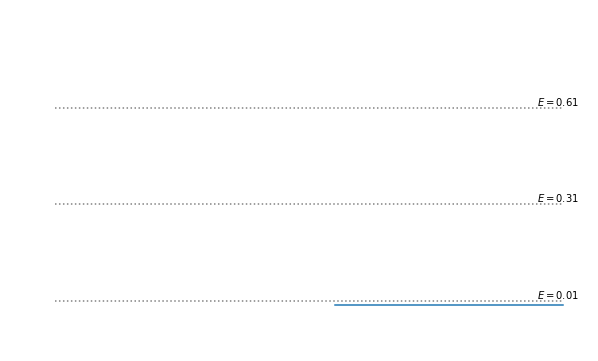

In [7]:
%pdb
shooting.plot_energy_diagram(shooting.isw, soft_edge=False)

In [8]:
from shooting import turning_point, isw

In [9]:
help(turning_point)

Help on function turning_point in module shooting.schrodinger:

turning_point(args, E, ubound=1000, increment=0)
    find the classical turning point for the potential and energy



In [10]:
turning_point((isw, ), 0.0001)

0.5000000000006111

/home/cmckay/PHYS381/notebooks/shooting/schrodinger.py:45: RuntimeWarning: invalid value encountered in double_scalars
  psidoubleprime = -(2*m/hbar**2)*(E-V(x))*psi


(-0.1, 0.9100000000010913)

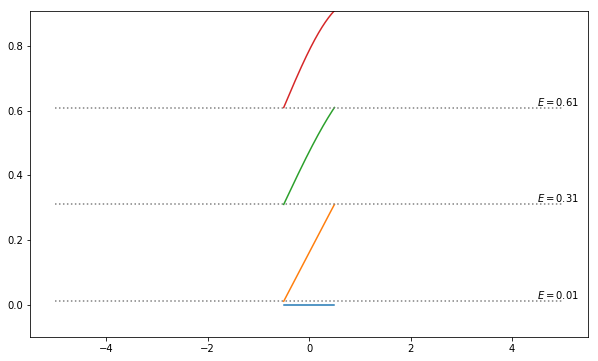

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from shooting import isw, get_energies, turning_point, schro_rhs
from scipy.integrate import odeint

n=3
V = isw
soft_edge=False

domain = np.linspace(-5, 5, 1000)
potential = V(domain)
minx = np.min(domain)
maxx = np.max(domain)
    
fig, ax = plt.subplots(1)
fig.set_figwidth(10)
fig.set_figheight(6)
    
ax.plot(domain, potential)
#ax.set_axis_off()
    
    # plot energies and eigenfunctions
energies = get_energies(V, n, soft_edge)
for energy in energies:
    ax.plot([minx, maxx], [energy, energy], ":", color="gray")
    y0 = (0.0, 1.0)
    if soft_edge:
        result = odeint(schro_rhs, y0, domain, args=(energy, V))
    else:
        tp = turning_point((V,), energy)-1.0e-6
        # still only works for symmetric potentials
        newdomain = np.linspace(-tp, tp, 1000)
        result = odeint(schro_rhs, y0, newdomain, args=(energy, V))
    amp = np.max(result[:,0]) - np.min(result[:,0])
    normalized = result[:,0]/amp
    # this needs to be made more general
    eigenfunction = 0.3*normalized + energy
    ax.plot(newdomain, eigenfunction)
    ax.text(4.5, energy,"$E={:5.2f}$".format(energy),  verticalalignment="bottom")
deltae = energies[-1] - energies[-2]    
ax.set_ylim(-0.1, energies[-1] + deltae)